In [1]:
import tifffile
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

c:\Users\alberto.vicente\Documents\lunas\.conda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\alberto.vicente\Documents\lunas\.conda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\alberto.vicente\Documents\lunas\.conda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def read_sequence(folder_path):
    """
    Read a sequence of TIFF files in a folder as a 3D volume.
    
    Args:
    folder_path (str): Path to the folder containing TIFF files.

    Returns:
    numpy.ndarray: A 3D array where each slice corresponds to a TIFF file.
    """

    # List and sort the TIFF files
    tiff_files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if (f.endswith('.tiff') or f.endswith('.tif'))])
    
    # Get the total number of TIFF files
    total_files = len(tiff_files)
    
    # Read each TIFF file and update progress
    volume = []
    with tqdm(total=total_files, desc="Progress") as pbar:
        for i, file_path in enumerate(tiff_files):
            slice_data = tifffile.imread(file_path)
            volume.append(slice_data)
            
            # Update progress
            pbar.update(1)
    
    return np.array(volume)

In [7]:
volume_path = Path(r'E:\temporal\volumenes\2+3+4+5\2\concatenated')

folder_Save = Path(r'E:\temporal\volumenes\2+3+4+5\2')

volume = read_sequence(volume_path)

#flip verticaly
volume = np.flip(volume, axis=1)

Progress: 100%|██████████| 7614/7614 [00:14<00:00, 536.71it/s]


In [8]:
def reslice(volume, name):

    if name == 'Top':
        resliced = np.transpose(volume, (1, 0, 2))[::-1, :, :]
        resliced = np.flip(resliced, axis=1)
    elif name == 'Left':
        resliced = np.transpose(volume, (2, 1, 0))
        resliced = np.flip(resliced, axis=2)
    elif name == 'Right':
        resliced = np.transpose(volume, (2, 1, 0))[::-1, :, :]
    elif name == 'Bottom':
        resliced = np.transpose(volume, (1, 0, 2))
    
    return resliced

In [9]:
resliced = reslice(volume, 'Left')

#print the shapes of the original and resliced volumes
print(volume.shape)
print(resliced.shape)

(7614, 1950, 350)
(350, 1950, 7614)


In [11]:
#save the resliced volume
tifffile.imwrite(folder_Save / 'resliced.tiff', resliced, imagej=True, metadata = {'axes': 'ZYX', 'unit':'um'})

c:\Users\alberto.vicente\Documents\lunas\.conda\lib\site-packages\tifffile\tifffile.py:3535: UserWarning: <tifffile.TiffWriter 'resliced.tiff'> truncating ImageJ file
  warnings.warn(


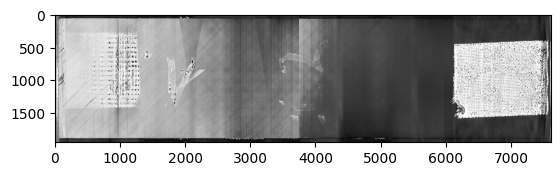

In [ ]:
plt.imshow(resliced[61], cmap='gray')